# Task4

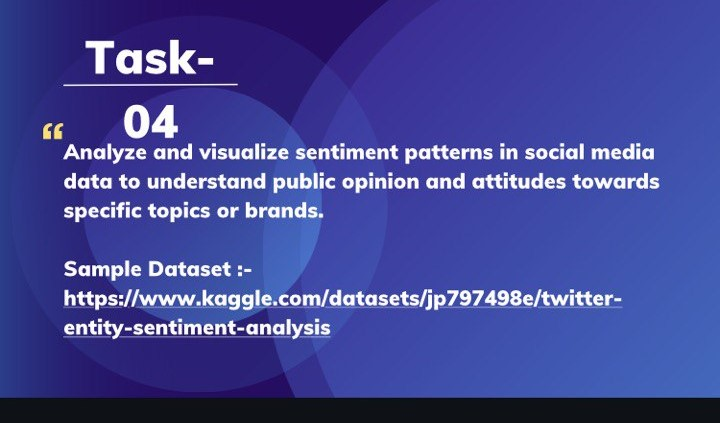

In [1]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset
columns=['id','entity','sentiment','text'] #to add header
df = pd.read_csv('twitter_training.csv',names= columns)

In [3]:
# Preprocess: Tokenize and remove stop words
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['text']= df['text'].astype(str).fillna('')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def preprocess_text(text):
    word_tokens = word_tokenize(text.lower())
    filtered_text = [word for word in word_tokens if word.isalnum() and word not in stop_words]
    return " ".join(filtered_text)

df['cleaned_text'] = df['text'].apply(preprocess_text)

In [5]:
df.head

<bound method NDFrame.head of          id       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                    text  \
0      im getting on borderlands and i will murder yo...   
1      I am coming to the borders and I will kill you...   
2      im getting on borderlands and i will kill you ...   
3      im coming on borderlands and i will murder you...   
4      im getting on borderlands 2 and i will murder ...   
...                                                  ...   
74677  Just realized that the Windows partition of my...   
74678  Just realized that my Mac 

In [6]:
df.info

<bound method DataFrame.info of          id       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                    text  \
0      im getting on borderlands and i will murder yo...   
1      I am coming to the borders and I will kill you...   
2      im getting on borderlands and i will kill you ...   
3      im coming on borderlands and i will murder you...   
4      im getting on borderlands 2 and i will murder ...   
...                                                  ...   
74677  Just realized that the Windows partition of my...   
74678  Just realized that my Ma

In [7]:
# Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)


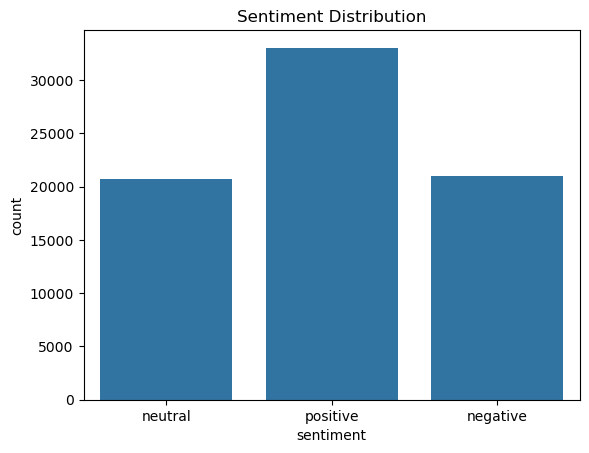

In [8]:
# Visualize sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

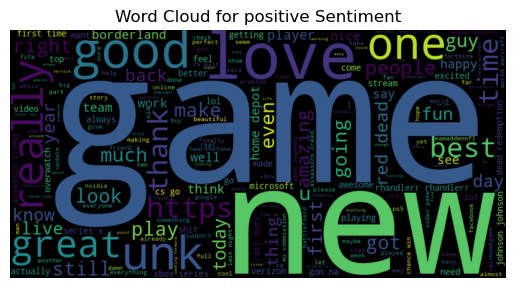

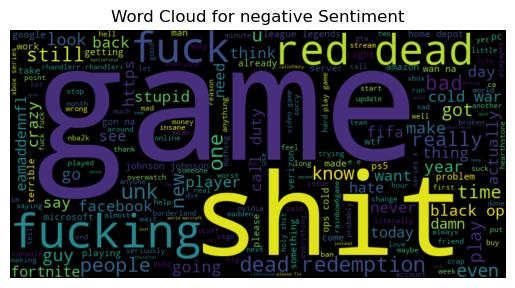

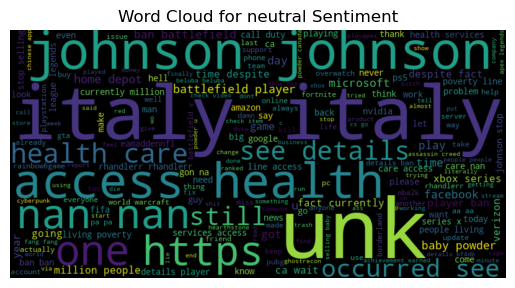

In [11]:
# (Optional) Word cloud for each sentiment type
from wordcloud import WordCloud

for sentiment in ['positive', 'negative', 'neutral']:
    sentiment_words = ' '.join(df[df['sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400).generate(sentiment_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()